# Analysis of spiking model
## Implemented (with slight variations) as repoted in Litwin-Kumar & Doiron, 2012

#### Taku Ito
#### 07/09/2019

In [1]:
import numpy as np
import model_nomatmul as model
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import convolve2d
%matplotlib inline
import numpy.matlib as matlib
from statsmodels.distributions.empirical_distribution import ECDF
import time as timepkg

#### Construct model, set parameters and synaptic efficacies

# Plot excitatory mean firing rate vs. excitatory mean input

___

#### John Murray's approach

___

# From Litwin-Kumar code

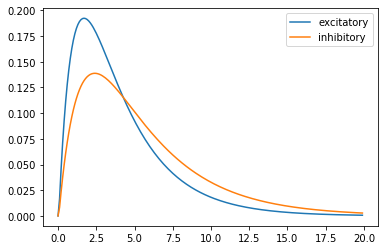

In [18]:
dt = 0.1
syntau1_e = 1.0
syntau1_i = 1.5
syntau2_e = 3
syntau2_i = 4
T = np.arange(0,20,.1)
Ie = np.zeros((1,len(T)))
Ii = np.zeros((1,len(T)))

xerise = np.zeros((1,len(T)))
xedecay = np.zeros((1,len(T)))
xirise = np.zeros((1,len(T)))
xidecay = np.zeros((1,len(T)))

# alphax_e = 2
# alphas_e = 2

# alphax_i = 2.5
# alphas_i = 2.5

spikes = np.zeros((1,len(T)))
spikes[0,0]=10
for t in range(len(T)-1):
    # K1
    k1xerise = -xerise[:,t]/syntau1_e + spikes[0,t]
    k1xedecay = -xedecay[:,t]/syntau2_e + spikes[0,t]

    k1xirise = -xirise[:,t]/syntau1_i + spikes[0,t]
    k1xidecay = -xidecay[:,t]/syntau2_i + spikes[0,t]
    
    # Midpoint
    a_xerise = xerise[:,t] + k1xerise*dt
    a_xedecay = xedecay[:,t] + k1xedecay*dt
    a_xirise = xirise[:,t] + k1xirise*dt
    a_xidecay = xidecay[:,t] + k1xidecay*dt
    
    # K2
    k2xerise = -a_xerise/syntau1_e + spikes[0,t]
    k2xedecay = -a_xedecay/syntau2_e + spikes[0,t]

    k2xirise = -a_xirise/syntau1_i + spikes[0,t]
    k2xidecay = -a_xidecay/syntau2_i + spikes[0,t]
 
    # RK2
    xerise[:,t+1] = xerise[:,t] + (k1xerise+k2xerise)*dt/2.0
    xedecay[:,t+1] = xedecay[:,t] + (k1xedecay+k2xedecay)*dt/2.0
    #
    xirise[:,t+1] = xirise[:,t] + (k1xirise+k2xirise)*dt/2.0
    xidecay[:,t+1] = xidecay[:,t] + (k1xidecay+k2xidecay)*dt/2.0
    
    Ie[:,t+1] = (xedecay[:,t+1]-xerise[:,t+1])/(syntau2_e - syntau1_e)
    Ii[:,t+1] = (xidecay[:,t+1]-xirise[:,t+1])/(syntau2_i - syntau1_i)
    

# xerise[ci] += -dt*xerise[ci]/tauerise + forwardInputsEPrev[ci]
# xedecay[ci] += -dt*xedecay[ci]/tauedecay + forwardInputsEPrev[ci]
# xirise[ci] += -dt*xirise[ci]/tauirise + forwardInputsIPrev[ci]
# xidecay[ci] += -dt*xidecay[ci]/tauidecay + forwardInputsIPrev[ci]

# synInput = (xedecay[ci] - xerise[ci])/(tauedecay - tauerise) + (xidecay[ci] - xirise[ci])/(tauidecay - tauirise)


plt.plot(T,Ie.T,label='excitatory')
plt.plot(T,Ii.T,label='inhibitory')
plt.legend()

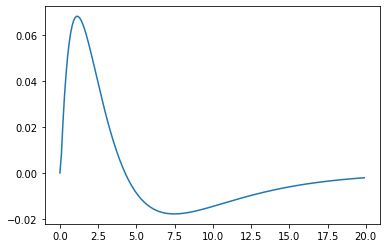

In [15]:
plt.plot(T,Ie.T - Ii.T,label='excitatory')
# plt.plot(T,Ii.T,label='inhibitory')